In [1]:
# Downloading Dataset

!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition


Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
fruit-and-vegetable-image-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
# Unzipping Data Set

import zipfile
zip_ref = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [1]:
# Importing TensorFlow and Keras Libraries

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report


In [2]:
# Loading and Preparing Training Dataset from Directory Using Keras

train_ds=keras.utils.image_dataset_from_directory(
  directory='/content/train',
    validation_split=0.2,
    subset= 'training',
    seed = 123,
    batch_size=32,
    image_size=(256,256),
)

Found 3115 files belonging to 36 classes.
Using 2492 files for training.


In [3]:
# Loading and Preparing Validation Dataset from Directory Using Keras

val_ds=keras.utils.image_dataset_from_directory(
  directory='/content/test',
  labels='inferred',
  label_mode='int',
  seed=123,
  batch_size=32,
  image_size=(256,256)
)

Found 359 files belonging to 36 classes.


In [4]:
class_names = train_ds.class_names
print(class_names)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [5]:
#  Optimizing Data Pipeline with Caching, Shuffling, and Prefetching

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(buffer_size=32).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(buffer_size=32).prefetch(buffer_size=AUTOTUNE)

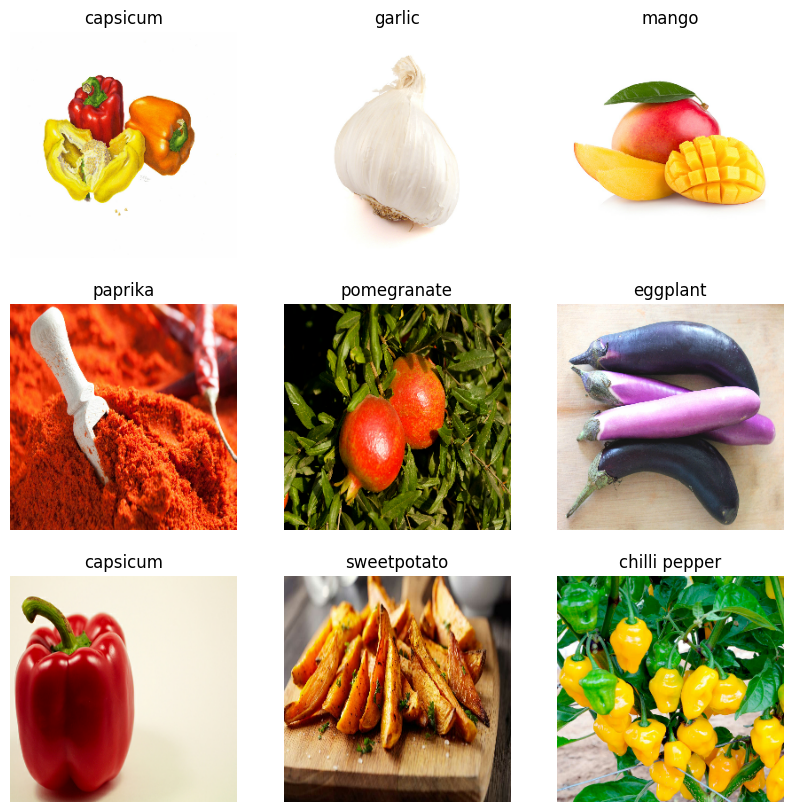

In [6]:
# Plotting images of fruits and vegitables

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
# Building and Augmenting a Convolutional Neural Network

num_classes = len(class_names)

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
])

model = Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

In [8]:
# Compiling and Summarizing the Model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                 

In [9]:
# Model Training with Validation Data

epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
78/78 [==============================] - 65s 442ms/step - loss: 3.5690 - accuracy: 0.0486 - val_loss: 3.1850 - val_accuracy: 0.0919
Epoch 2/15
78/78 [==============================] - 3s 44ms/step - loss: 3.0404 - accuracy: 0.1461 - val_loss: 2.5517 - val_accuracy: 0.2479
Epoch 3/15
78/78 [==============================] - 3s 45ms/step - loss: 2.6662 - accuracy: 0.2155 - val_loss: 2.1744 - val_accuracy: 0.3454
Epoch 4/15
78/78 [==============================] - 3s 43ms/step - loss: 2.4471 - accuracy: 0.2532 - val_loss: 2.1345 - val_accuracy: 0.3565
Epoch 5/15
78/78 [==============================] - 3s 43ms/step - loss: 2.3223 - accuracy: 0.2845 - val_loss: 2.2200 - val_accuracy: 0.2869
Epoch 6/15
78/78 [==============================] - 4s 46ms/step - loss: 2.2252 - accuracy: 0.3287 - val_loss: 1.9132 - val_accuracy: 0.4011
Epoch 7/15
78/78 [==============================] - 3s 43ms/step - loss: 2.1617 - accuracy: 0.3419 - val_loss: 1.7033 - val_accuracy: 0.4652
Epoch 8/15


In [10]:
# Loading and Preparing the Test Dataset

test_url ="/content/test"
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_url,
    seed = 123,
    image_size=(256,256),
    shuffle=False
)

Found 359 files belonging to 36 classes.


In [11]:
# Making Predictions and Scoring the Test Dataset

test_images, test_labels = tuple(zip(*test_ds))

predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions)

12/12 [==============================] - 10s 810ms/step


In [12]:
#Evaluating the Model on the Test Dataset

results = model.evaluate(test_ds)
print("Test loss, test acc:", results)

12/12 [==============================] - 10s 852ms/step - loss: 1.2709 - accuracy: 0.5627
Test loss, test acc: [1.2709238529205322, 0.5626741051673889]


In [14]:
#Calculating and Comparing Predictions with True Labels

y_test = np.concatenate(test_labels)
y_pred = np.array([np.argmax(s) for s in score])

print(classification_report(y_test, y_pred, target_names=class_names))


               precision    recall  f1-score   support

        apple       0.44      0.40      0.42        10
       banana       0.75      0.33      0.46         9
     beetroot       0.82      0.90      0.86        10
  bell pepper       0.50      0.40      0.44        10
      cabbage       0.69      0.90      0.78        10
     capsicum       0.83      0.50      0.62        10
       carrot       0.86      0.60      0.71        10
  cauliflower       0.86      0.60      0.71        10
chilli pepper       0.25      0.10      0.14        10
         corn       0.25      0.20      0.22        10
     cucumber       0.25      0.10      0.14        10
     eggplant       1.00      0.40      0.57        10
       garlic       0.75      0.90      0.82        10
       ginger       0.56      0.50      0.53        10
       grapes       0.70      0.70      0.70        10
     jalepeno       0.56      0.50      0.53        10
         kiwi       0.67      0.60      0.63        10
        l

In [15]:
#Importing Libraries for Image Processing and Visualization

import cv2
import matplotlib.pyplot as plt

In [16]:
#Generating Predictions on a Batch of Images

image_batch, label_batch = next(iter(train_ds))
prediction_batch = model.predict(image_batch)
score_batch = tf.nn.softmax(prediction_batch)

1/1 [==============================] - 0s 278ms/step


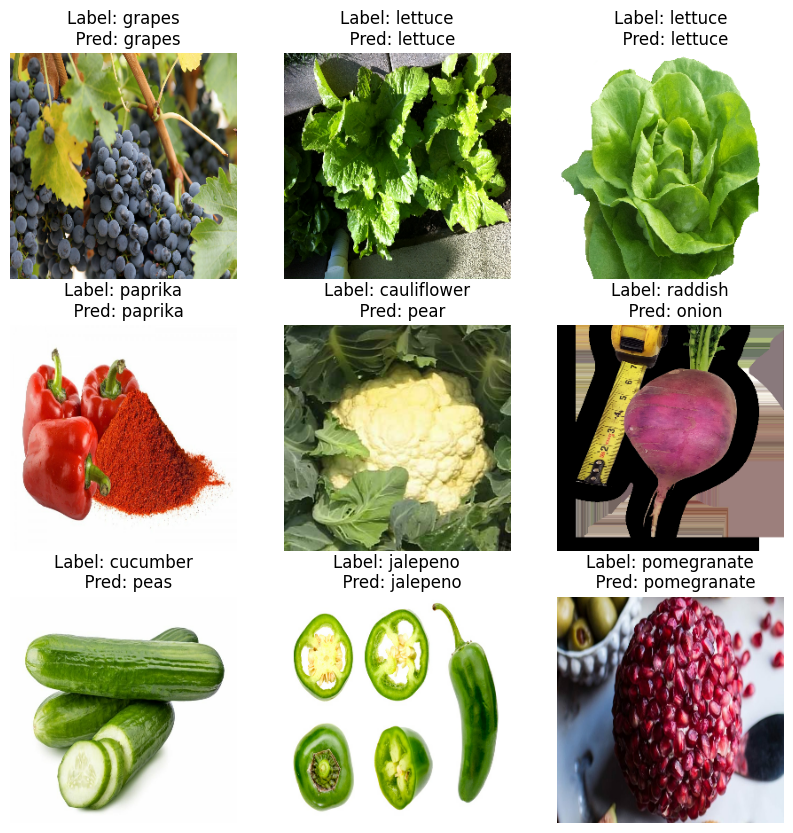

In [17]:
#Visualizing Predictions on a Batch of Images

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title( "Label: " + class_names[label] + "\n  Pred: " + class_names[np.argmax(score_batch[i])])
  plt.axis("off")

In [ ]:
# by seeing the batch image predictions we may conclude that the prediction accuracy is good but need to be improved.

# By applying Tuning accuracy can be improved